## Importing libraries

In [62]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score as CVS
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Conecting to Google Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load, analyse and pre-processing data

In [64]:
# Load train and test data sets, indexing by number Id
df_train = pd.read_csv("/content/drive/MyDrive/Datasets/carInsurance_train.csv", index_col= 'Id')
df_test = pd.read_csv("/content/drive/MyDrive/Datasets/carInsurance_test.csv", index_col= 'Id')

In [65]:
# Apllying the function head() to have a quick look of the dataset
df_train.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [66]:
df_test.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [67]:
# Apply the function info() to check the data type and if have missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               3981 non-null   object
 2   Marital           4000 non-null   object
 3   Education         3831 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     3098 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  Outcome           958 non-null    object
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4001 to 5000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Job               995 non-null    object 
 2   Marital           1000 non-null   object 
 3   Education         953 non-null    object 
 4   Default           1000 non-null   int64  
 5   Balance           1000 non-null   int64  
 6   HHInsurance       1000 non-null   int64  
 7   CarLoan           1000 non-null   int64  
 8   Communication     779 non-null    object 
 9   LastContactDay    1000 non-null   int64  
 10  LastContactMonth  1000 non-null   object 
 11  NoOfContacts      1000 non-null   int64  
 12  DaysPassed        1000 non-null   int64  
 13  PrevAttempts      1000 non-null   int64  
 14  Outcome           243 non-null    object 
 15  CallStart         1000 non-null   object 
 16  CallEnd           1000 non-null   objec

In [69]:
# Filling missing values by mode in Education, Job and Communication 
missing_values = ['Job', 'Education', 'Communication', 'Outcome']
for value in missing_values[:3]:
  df_train[value] = df_train[value].fillna(
      df_train[value].dropna().mode().values[0])

  print(f"{value}:\n{df_train[value].value_counts()}\n", '-'*50)

Job:
management       912
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: Job, dtype: int64
 --------------------------------------------------
Education:
secondary    2157
tertiary     1282
primary       561
Name: Education, dtype: int64
 --------------------------------------------------
Communication:
cellular     3733
telephone     267
Name: Communication, dtype: int64
 --------------------------------------------------


In [70]:
# Filling missing values by no previous contact in Outcome
for value in missing_values[:3]:
  df_test[value] = df_test[value].fillna(
  df_test[value].dropna().mode().values[0])

df_train['Outcome'] = df_train['Outcome'].fillna('no previous contact')
df_test['Outcome'] = df_test['Outcome'].fillna('no previous contact')

In [71]:
# Checking if it has no missing value now
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               4000 non-null   object
 2   Marital           4000 non-null   object
 3   Education         4000 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     4000 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  Outcome           4000 non-null   object
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

## Data visualization

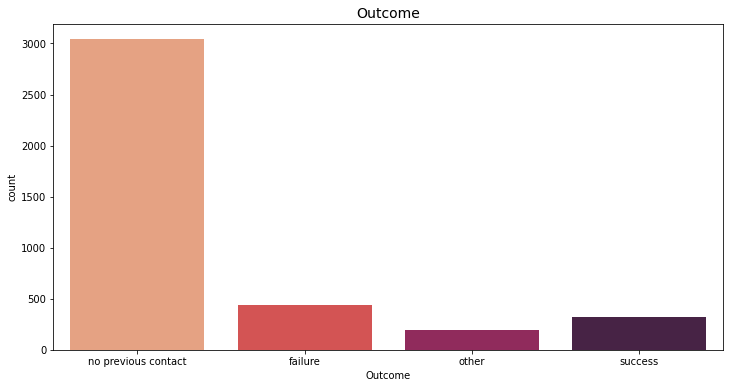

% of total:
no previous contact    76.05
failure                10.92
success                 8.15
other                   4.88
Name: Outcome, dtype: float64


In [72]:
# Plot to see if it has a previous contact
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=df_train, palette='rocket_r')
plt.title('Outcome', fontsize=14)
plt.show()
print('% of total:')
print(round((df_train['Outcome'].value_counts()/df_train.shape[0]), 4)*100)

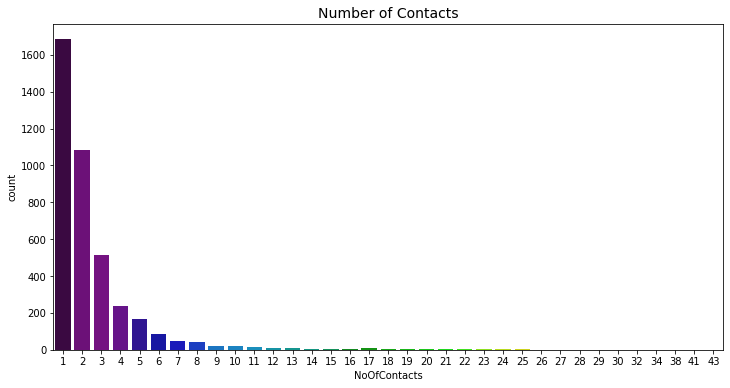

% of total:
1     42.12
2     27.12
3     12.90
4      5.92
5      4.15
6      2.20
7      1.22
8      1.02
9      0.50
10     0.45
11     0.38
17     0.28
12     0.28
13     0.20
14     0.18
20     0.10
21     0.10
25     0.10
15     0.08
19     0.08
23     0.08
16     0.08
18     0.08
24     0.08
22     0.08
43     0.02
26     0.02
28     0.02
30     0.02
32     0.02
34     0.02
41     0.02
27     0.02
29     0.02
38     0.02
Name: NoOfContacts, dtype: float64


In [73]:
# Plot to see the number of contacts, if It had
plt.figure(figsize=(12, 6))
sns.countplot(x='NoOfContacts', data=df_train, palette='nipy_spectral')
plt.title('Number of Contacts', fontsize=14)
plt.show()
print('% of total:')
print(round((df_train['NoOfContacts'].value_counts()/df_train.shape[0]), 4)*100)

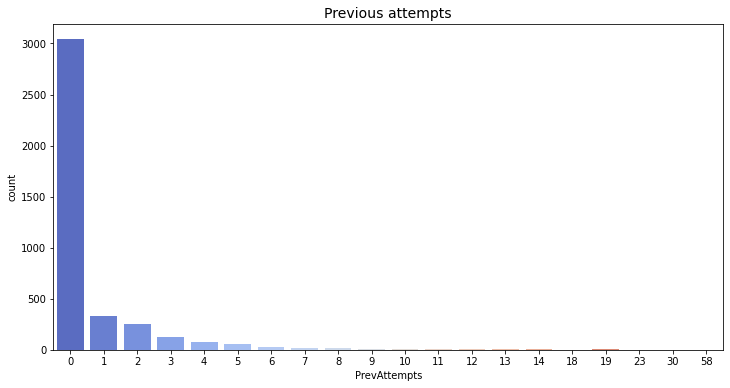

% of total
0     76.05
1      8.38
2      6.28
3      3.12
4      1.98
5      1.50
6      0.62
7      0.52
8      0.45
10     0.25
9      0.22
14     0.12
12     0.12
13     0.10
19     0.10
11     0.08
23     0.02
18     0.02
58     0.02
30     0.02
Name: PrevAttempts, dtype: float64


In [74]:
# plot to see previous attempts
plt.figure(figsize=(12, 6))
sns.countplot(x='PrevAttempts', data=df_train, palette='coolwarm')
plt.title('Previous attempts', fontsize=14)
plt.show()
print('% of total')
print(round((df_train['PrevAttempts'].value_counts()/df_train.shape[0]), 4)* 100)

### age group

- young adult - 18-29
- adult - 30-39
- middle aged - 40-49
- veteran - 50-59
- senior - 60+

In [75]:
# create a new column with the age group
bins = [18, 30, 40, 50, 60, 100]
labels = ['young adult', 'adult', 'middle aged', 'veteran', 'senior']
df_train['Age_Group'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)

### call season

- Winter
- Spring
- Summer
- Fall

In [76]:
# create a new column with the call season
seasons = {'dec': 0, 'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11}
df_train = df_train.applymap(lambda lable: seasons.get(lable) if lable in seasons else lable)
bins = [0, 3, 6, 9, 12]
labels = ['winter', 'spring', 'summer', 'fall']
df_train['LC_Seasons'] = pd.cut(df_train['LastContactMonth'], bins=bins, labels=labels, right=False)
df_train['LC_Seasons'].head()

Id
1    winter
2    spring
3    summer
4    spring
5    summer
Name: LC_Seasons, dtype: category
Categories (4, object): ['winter' < 'spring' < 'summer' < 'fall']

### call month period

- begining
- middle
- end

In [77]:
# create a new column with call moth period
bins = [0, 10, 20, 32]
labels = ['begining', 'middle', 'end']
df_train['LC_Month_Period'] = pd.cut(df_train['LastContactDay'], bins=bins, labels=labels, right=False)
df_train['LC_Month_Period'].head()

Id
1         end
2         end
3    begining
4      middle
5    begining
Name: LC_Month_Period, dtype: category
Categories (3, object): ['begining' < 'middle' < 'end']

### balance status

- negative balance
- low
- mid
- high

In [78]:
# create a new column with the balance status
df_train['Balance_status'] = pd.cut(df_train['Balance'], bins = [-4000, 0, 1000, 5000, 100000], labels = ['negative balance', 'low', 'mid', 'high'], include_lowest=True)
df_train['Balance_status'].head()

Id
1    mid
2    mid
3    low
4    low
5    mid
Name: Balance_status, dtype: category
Categories (4, object): ['negative balance' < 'low' < 'mid' < 'high']

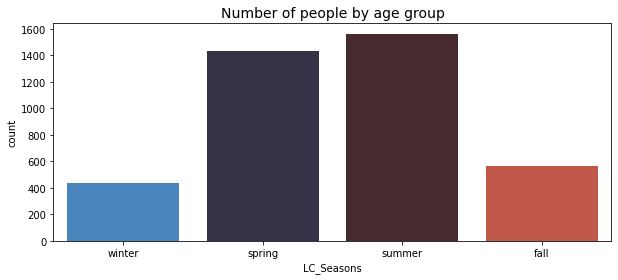

% of total:
summer    39.08
spring    35.85
fall      14.15
winter    10.92
Name: LC_Seasons, dtype: float64


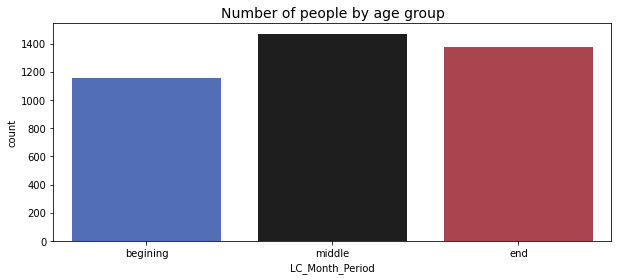

% of total:
middle      36.72
end         34.35
begining    28.92
Name: LC_Month_Period, dtype: float64


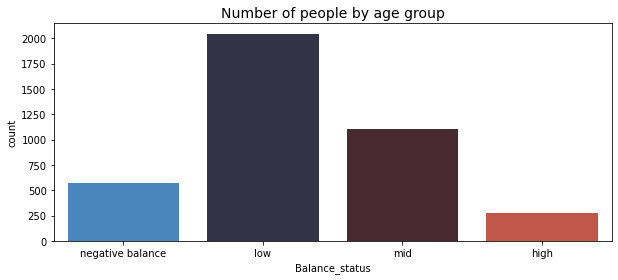

% of total:
low                 51.10
mid                 27.58
negative balance    14.35
high                 6.98
Name: Balance_status, dtype: float64


In [79]:
# plot the new features
cols = df_train.columns.to_list()
for col in cols[19:]:
  plt.figure(figsize=(10, 4))
  sns.countplot(x=col, data=df_train, palette='icefire')
  plt.title('Number of people by age group', fontsize=14)
  plt.show()
  print('% of total:')
  print(round((df_train[col].value_counts()/df_train.shape[0]), 4) * 100)

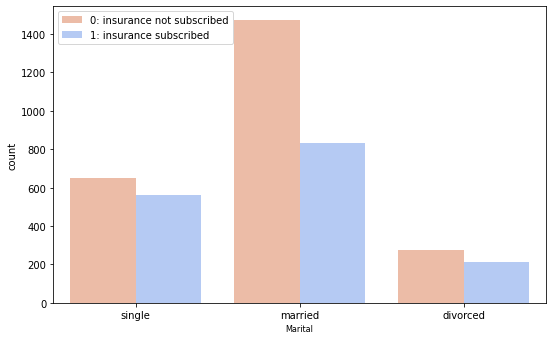

In [80]:
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 1)
sns.countplot(x='Marital', hue='CarInsurance', data=df_train, palette='coolwarm_r')
plt.xlabel('Marital', fontsize=8)
plt.legend(('0: insurance not subscribed', '1: insurance subscribed'), loc='upper left')

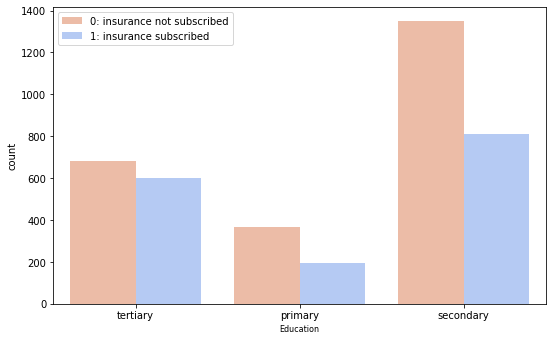

In [81]:
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 1)
sns.countplot(x='Education', hue='CarInsurance', data=df_train, palette='coolwarm_r')
plt.xlabel('Education', fontsize= 8)
plt.legend(('0: insurance not subscribed', '1: insurance subscribed'), loc='upper left')

## Insert into the test set the new features

In [82]:
# age group
df_test['Age_Group'] = pd.cut(df_test['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['young adult', 'adult', 'middle aged', 'veteran', 'senior'], right=False)

# seasons
df_test = df_test.applymap(lambda lable: seasons.get(lable) if lable in seasons else lable)
df_test['LC_Seasons'] = pd.cut(df_test['LastContactMonth'], bins=[0, 3, 6, 9, 12], labels=['winter', 'spring', 'summer', 'fall'], right=False)

# month period
df_test['LC_Month_Period'] = pd.cut(df_test['LastContactDay'], bins=[0, 10, 20, 32], labels=['begining', 'middle', 'end'], right=False)

# balance status
df_test['Balance_status'] = pd.cut(df_test['Balance'], bins = [-4000, 0, 1000, 5000, 100000], labels=['negative balance', 'low', 'mid', 'high'], include_lowest=True)

# reoder the columns including the new ones
reorder_columns = ['Job', 'HHInsurance', 'CarLoan', 'PrevAttempts', 'Outcome',  'Age_Group', 'LC_Seasons', 'LC_Month_Period', 'Balance_status', 'CarInsurance']
df_train = df_train[reorder_columns]
df_test = df_test[reorder_columns]
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Job              4000 non-null   object  
 1   HHInsurance      4000 non-null   int64   
 2   CarLoan          4000 non-null   int64   
 3   PrevAttempts     4000 non-null   int64   
 4   Outcome          4000 non-null   object  
 5   Age_Group        4000 non-null   object  
 6   LC_Seasons       4000 non-null   category
 7   LC_Month_Period  4000 non-null   category
 8   Balance_status   4000 non-null   category
 9   CarInsurance     4000 non-null   int64   
dtypes: category(3), int64(4), object(3)
memory usage: 422.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4001 to 5000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Job              1000 non-null   object  
 1   HHI

## Feature enconding
- one hot enconding
- label enconding

In [83]:
# label enconding
le = LabelEncoder()
labels = ['Age_Group', 'LC_Seasons', 'LC_Month_Period', 'Balance_status']

for i in labels:
  df_train[i] = le.fit_transform(df_train[i])
  df_test[i] = le.fit_transform(df_test[i])

# one hot encoding
cols = ['Job', 'Outcome']
one_hot = OneHotEncoder(handle_unknown='ignore', sparse=False)
df_train_onehot = pd.DataFrame(one_hot.fit_transform(df_train[cols])).astype('int64')
df_test_onehot = pd.DataFrame(one_hot.fit_transform(df_test[cols])).astype('int64')

# get feature columns
df_train_onehot.columns = one_hot.get_feature_names(cols)
df_test_onehot.columns = one_hot.get_feature_names(cols)

# Put the index back
df_train_onehot.index = df_train.index
df_test_onehot.index = df_test.index

df_train_fe = pd.concat([df_train, df_train_onehot], axis=1)
df_test_fe = pd.concat([df_test, df_test_onehot], axis=1)

# creating new columns names with the feature engeenired
df_train_fe = df_train_fe.drop(cols, axis=1)
df_test_fe = df_test_fe.drop(cols, axis=1)

print(df_train_fe.info())
print(df_test_fe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   HHInsurance                  4000 non-null   int64
 1   CarLoan                      4000 non-null   int64
 2   PrevAttempts                 4000 non-null   int64
 3   Age_Group                    4000 non-null   int64
 4   LC_Seasons                   4000 non-null   int64
 5   LC_Month_Period              4000 non-null   int64
 6   Balance_status               4000 non-null   int64
 7   CarInsurance                 4000 non-null   int64
 8   Job_admin.                   4000 non-null   int64
 9   Job_blue-collar              4000 non-null   int64
 10  Job_entrepreneur             4000 non-null   int64
 11  Job_housemaid                4000 non-null   int64
 12  Job_management               4000 non-null   int64
 13  Job_retired                  4000 non-null   int

## Machine learning algorithms

In [84]:
# preparing the dataset to fit the model
X = df_train_fe.drop('CarInsurance', axis=1)
y = df_train_fe['CarInsurance']

# split the dataset into train and test set
X_train, X_test, y_train, x_train = train_test_split(X, y, test_size = 0.7, random_state = 100)

In [85]:
# create a method to apply the algorithms
def cross_val(model_name, model, X, y, cv):
  score = CVS(model, X, y, cv=cv)
  print(f'{model_name} Scores:')
  for i in score:
    print(round(i, 2))
  print(f'Average {model_name} score: {round(score.mean(), 4)}')

index = ['Validation1', 'Validation2', 'Validation3', 'Validation4', 'Validation5']
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [86]:
# Logistic regression
lr = LogisticRegression()
lr_report = pd.DataFrame(cross_validate(lr, X, y, scoring=scoring))
lr_report = lr_report.iloc[:, 2:]
lr_report.columns = scoring
lr_report.index = index
model_1 = []

# classification report
print('Classification report:\n')
print(lr_report, '\n\n')
print('Mean scores:\n')
for score in scoring:
  print(f'\t{score}: {round(lr_report[score].mean(), 4)}')
  model_1.append(round(lr_report[score].mean(), 4))

Classification report:

             accuracy  precision    recall        f1
Validation1   0.67375   0.712230  0.309375  0.431373
Validation2   0.67875   0.695122  0.355140  0.470103
Validation3   0.71000   0.779874  0.386293  0.516667
Validation4   0.70000   0.771812  0.358255  0.489362
Validation5   0.67750   0.720280  0.320872  0.443966 


Mean scores:

	accuracy: 0.688
	precision: 0.7359
	recall: 0.346
	f1: 0.4703


In [87]:
# Random forest
random_forest = RandomForestClassifier()
random_forest_report = pd.DataFrame(cross_validate(random_forest, X, y, scoring=scoring))
random_forest_report = random_forest_report.iloc[:, 2:]
random_forest_report.columns = scoring
random_forest_report.index = index
model_2 = []

# classification report
print('Classification report:\n')
print(random_forest_report, '\n\n')
print('Mean scores:\n')
for score in scoring:
  print(f'\t{score}: {round(random_forest_report[score].mean(), 4)}')
  model_2.append(round(random_forest_report[score].mean(), 4))

Classification report:

             accuracy  precision    recall        f1
Validation1   0.64625   0.571429  0.462500  0.511226
Validation2   0.65875   0.586957  0.504673  0.542714
Validation3   0.69250   0.635379  0.548287  0.588629
Validation4   0.64125   0.562500  0.476636  0.516020
Validation5   0.65625   0.589147  0.473520  0.525043 


Mean scores:

	accuracy: 0.659
	precision: 0.5891
	recall: 0.4931
	f1: 0.5367


## Results for test set
In this problem the most important metrict to look for is recall, which identifies the percentage of correct positives out of all positives, in other words the percentage which the model predict that It would buy the insurance and It bought the insurance. So the algorithm that is better in recall is random forest

In [88]:
# apply random forest to predict the number of people, who will buy the insurance
# fit the model
random_forest.fit(X, y)
X_test = df_test_fe.drop('CarInsurance', axis=1)
# predict
df_test_fe['CarInsurance'] = random_forest.predict(X_test)
df_test_fe['CarInsurance'] = df_test_fe['CarInsurance'].apply(lambda x: 'It will not buy insurance' if x==0 else 'It will buy insurance')
columns = ['HHInsurance', 'CarLoan', 'PrevAttempts',  'Age_Group',
       'LC_Seasons', 'LC_Month_Period',  
       'Balance_status', 'Job_admin.', 'Job_blue-collar',
       'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired',
       'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician',
       'Job_unemployed', 'Outcome_failure',
       'Outcome_other', 'Outcome_success', 'CarInsurance']
df_test_fe = df_test_fe[columns]
df_test_fe['CarInsurance'].value_counts()

It will not buy insurance    681
It will buy insurance        319
Name: CarInsurance, dtype: int64